In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Original 데이터 불러오기

In [2]:
df = pd.read_csv('TRAY1_data_.csv', index_col=0)
target_col = df.columns[3:]
print(f"Sequence의 개수: {len(df['Sequence'].unique())} \n") 
print(df.shape)
df.head()

Sequence의 개수: 999 

(15110, 12)


Time  Sequence  Step  Velocity_Q1  Velocity_Q2  Velocity_Q3  Torque_Q1  \
0  0.00         0     0          0.0          0.0          0.0        7.0   
1  0.18         0     1          0.0          0.0          0.0        7.0   
2  0.37         0     2         13.0          1.0         19.0      131.0   
3  0.56         0     3         16.0          4.0         23.0      132.0   
4  0.76         0     4         17.0          5.0         20.0      119.0   

   Torque_Q2  Torque_Q3  Position_error_Q1  Position_error_Q2  \
0       64.0       75.0              6.124              1.688   
1       64.0       74.0              6.124              1.688   
2       55.0      102.0              6.124              1.687   
3       76.0      109.0              5.754              1.626   
4       75.0      120.0              5.322              1.511   

   Position_error_Q3  
0             -7.805  
1             -7.805  
2             -7.797  
3             -7.301  
4             -6.734

## Sequence 별로 Step의 개수 찾기

In [3]:
step_df = df.groupby('Sequence').max('Step')[['Step']].reset_index()
step_df.columns = ['Sequence', 'Step_len']
step_df['Step_len'] += 1 # Step의 개수가 0부터 시작하기 때문에 직관적 이해를 위해서 +1 해주기
step_df

Sequence  Step_len
0           0        17
1           1        17
2           2        18
3           3        17
4           4        18
..        ...       ...
994       996        11
995       997        10
996       998        13
997       999        12
998      1000        13

[999 rows x 2 columns]

In [4]:
step_df.value_counts('Step_len').sort_index()

Step_len
6       1
8       6
9      29
10     65
11     25
12     98
13    163
14     86
16     23
17     51
18    452
dtype: int64

In [5]:
step_18_sequence_lst = list(step_df[step_df['Step_len'] == 18]['Sequence'])
step_non_18_sequence_lst = list(step_df[step_df['Step_len'] != 18]['Sequence'])
print(f"Step의 개수가 max(18)인 Sequence의 개수 및 Sequence 길이를 담고 있는 List: {len(step_18_sequence_lst)}")
print(f"Step의 개수가 max(18)가 아닌 Sequence의 개수 및 Sequence 길이를 담고 있는 List: {len(step_non_18_sequence_lst)}")

Step의 개수가 max(18)인 Sequence의 개수 및 Sequence 길이를 담고 있는 List: 452
Step의 개수가 max(18)가 아닌 Sequence의 개수 및 Sequence 길이를 담고 있는 List: 547


## 1. Step의 개수가 Max인 데이터

Step의 개수가 max(18)인 Sequence의 개수: 452


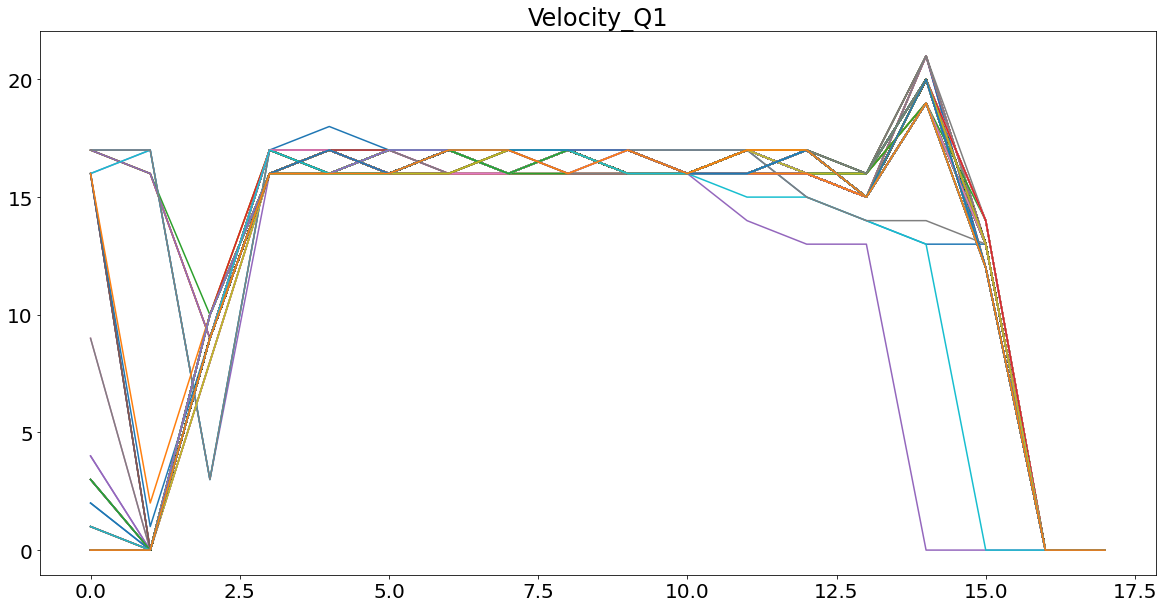

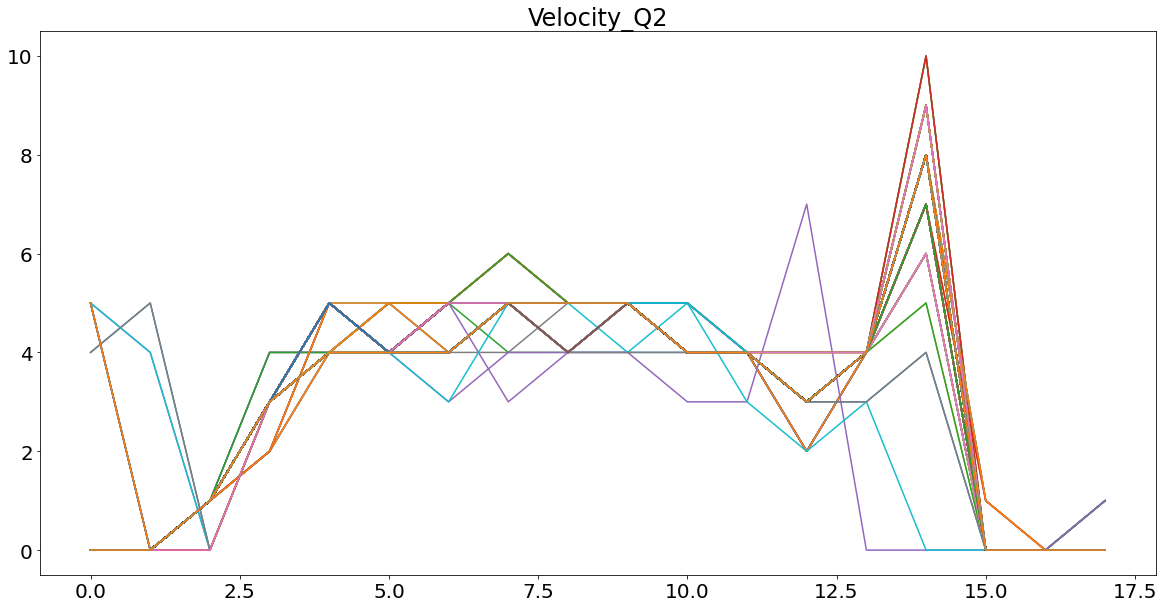

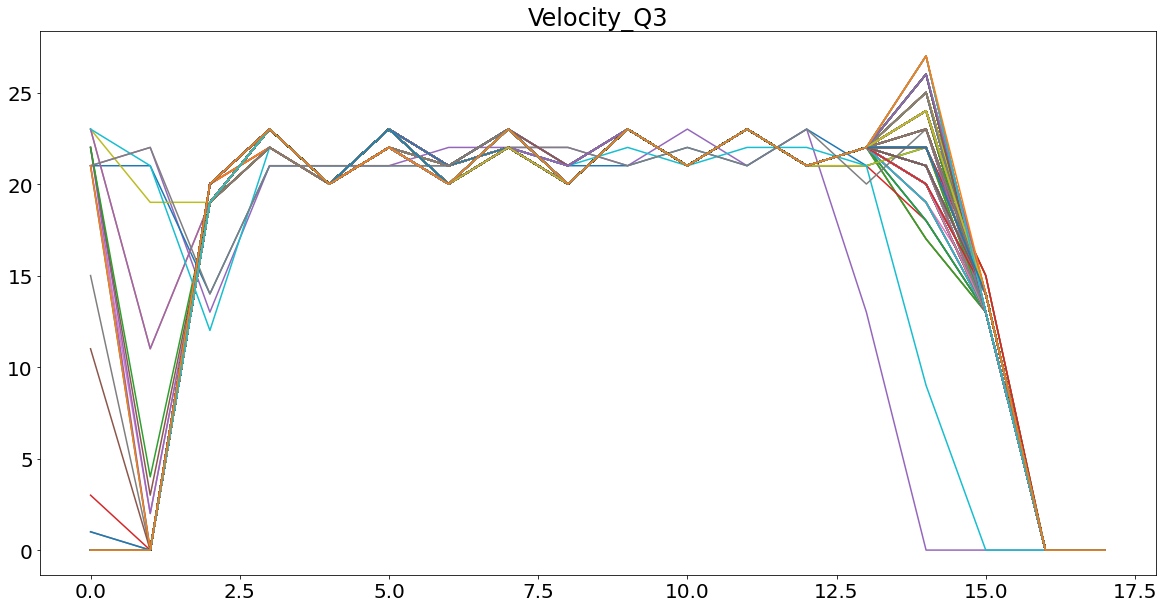

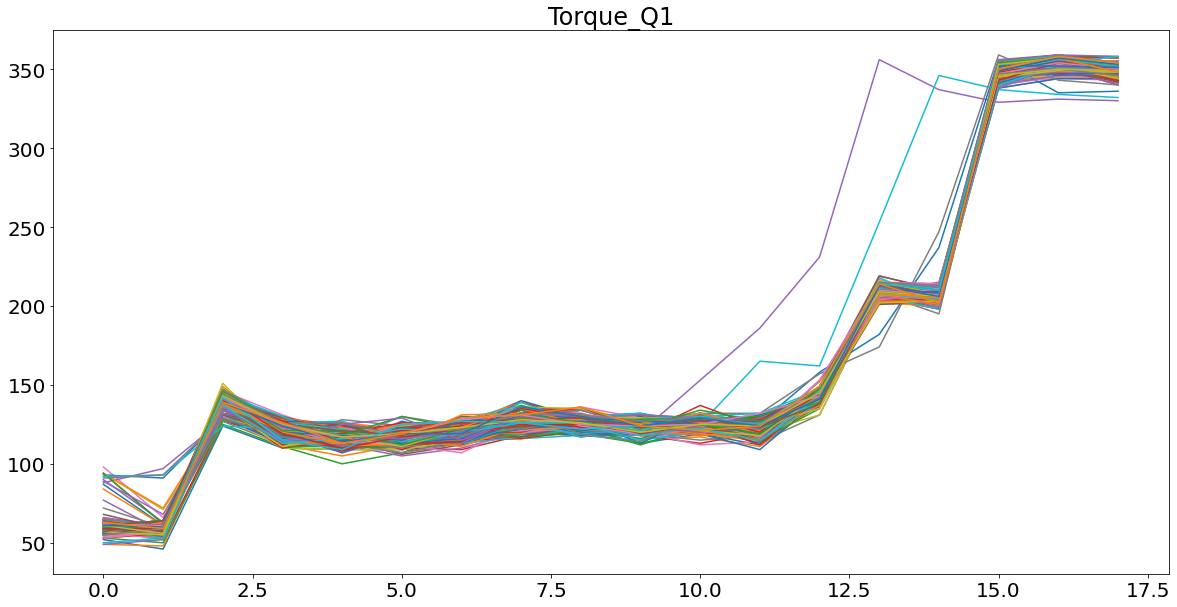

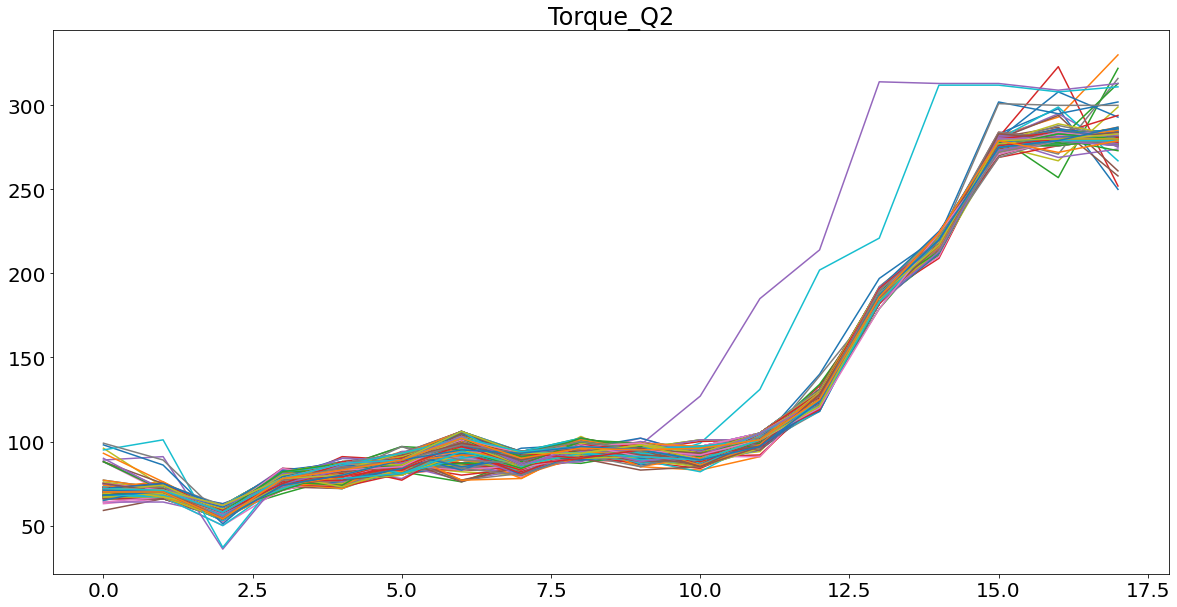

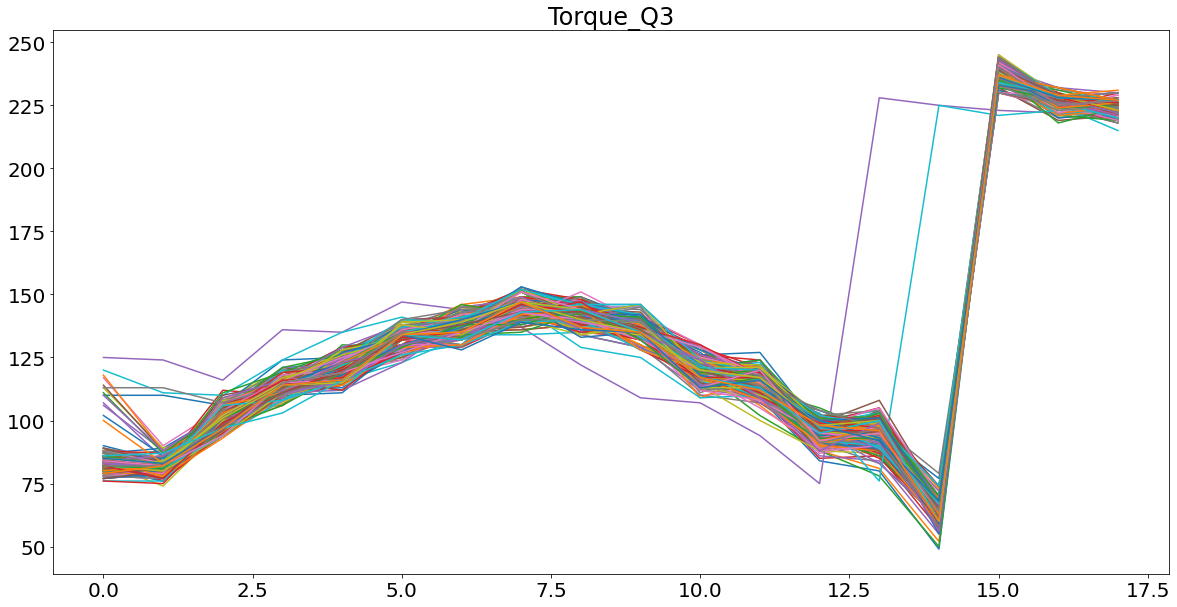

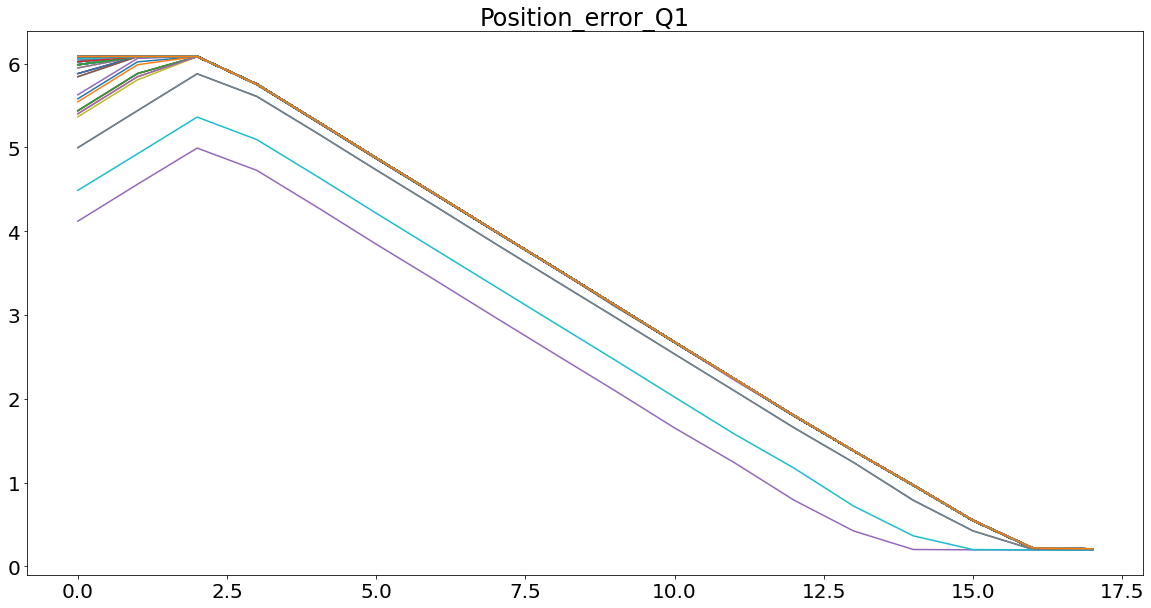

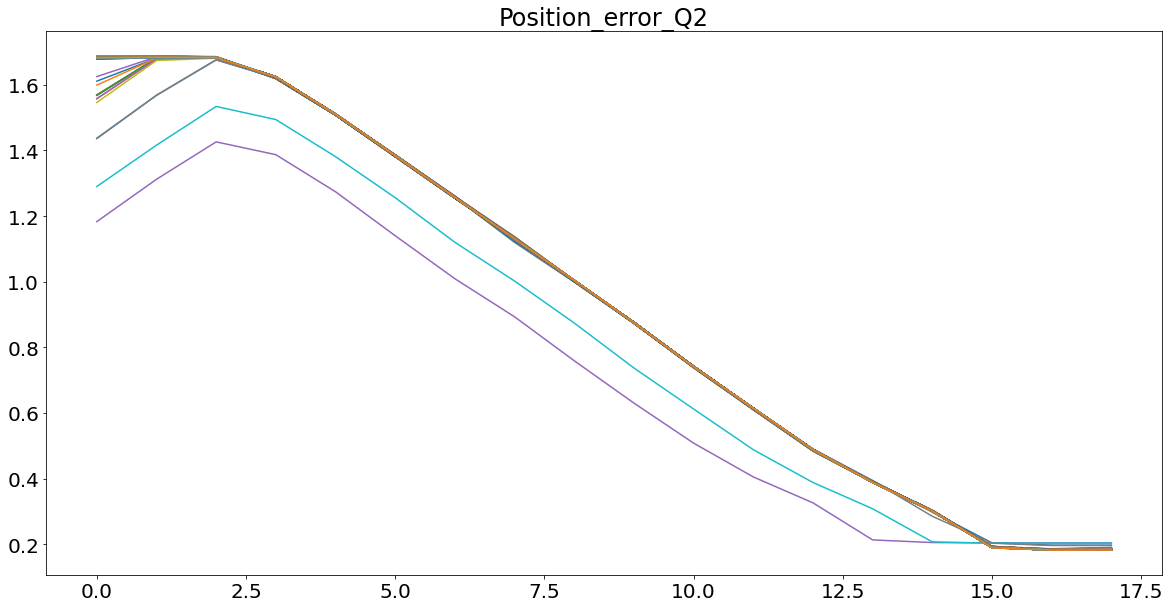

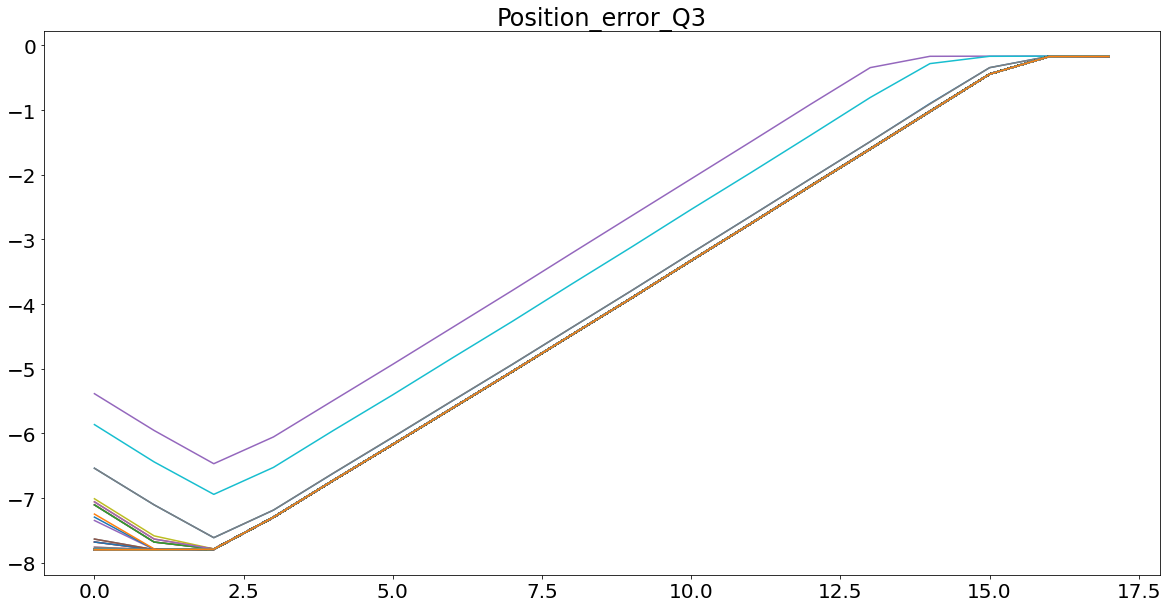

In [6]:
print(f"Step의 개수가 max(18)인 Sequence의 개수: {len(step_18_sequence_lst)}")
step_18_df = df[df['Sequence'].isin(step_18_sequence_lst)]

for col in target_col:
    plt.figure(figsize=(20, 10))
    plt.rc('font', size=20)
    
    for s in step_18_sequence_lst:
        step_18_df[step_18_df['Sequence'] == s][col].reset_index(drop=True).plot()
    plt.title(f"{col}")
    plt.show()

## 2. Step의 개수가 Max가 아닌 데이터

In [7]:
P_E_Q1 = step_18_df[step_18_df['Step'] == 10]['Position_error_Q1'].mean()
P_E_Q2 = step_18_df[step_18_df['Step'] == 10]['Position_error_Q2'].mean()
P_E_Q3 = step_18_df[step_18_df['Step'] == 10]['Position_error_Q3'].mean()
print(P_E_Q1)
print(P_E_Q2)
print(P_E_Q3)

2.6720331858407085
0.7401858407079743
-3.321371681415933


In [8]:
curr_df = df[(df['Position_error_Q1'] <= P_E_Q1) & (df['Position_error_Q2'] <= P_E_Q2) & (df['Position_error_Q3'] >= P_E_Q3)]
curr_group_df = curr_df.groupby('Sequence').count()[['Step']]
curr_group_df.value_counts('Step').sort_index()

Step
1      4
2     34
3     58
4     96
5     39
6    192
7    559
8      4
9      2
dtype: int64

In [9]:
sequence_dic = {}
for i in sorted(curr_df.groupby('Sequence').count()[['Step']]['Step'].unique()):
    sequence_dic[i] = list(curr_group_df[curr_group_df['Step'] == i].index)

print(sequence_dic.keys()) # sequence_dic의 key: Step의 개수, value: Sequence의 num

dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9])


Step의 개수가 max(18)가 아닌 Sequence의 개수: 547
Step의 개수: [6, 8, 9, 10, 11, 12, 13, 14, 16, 17]


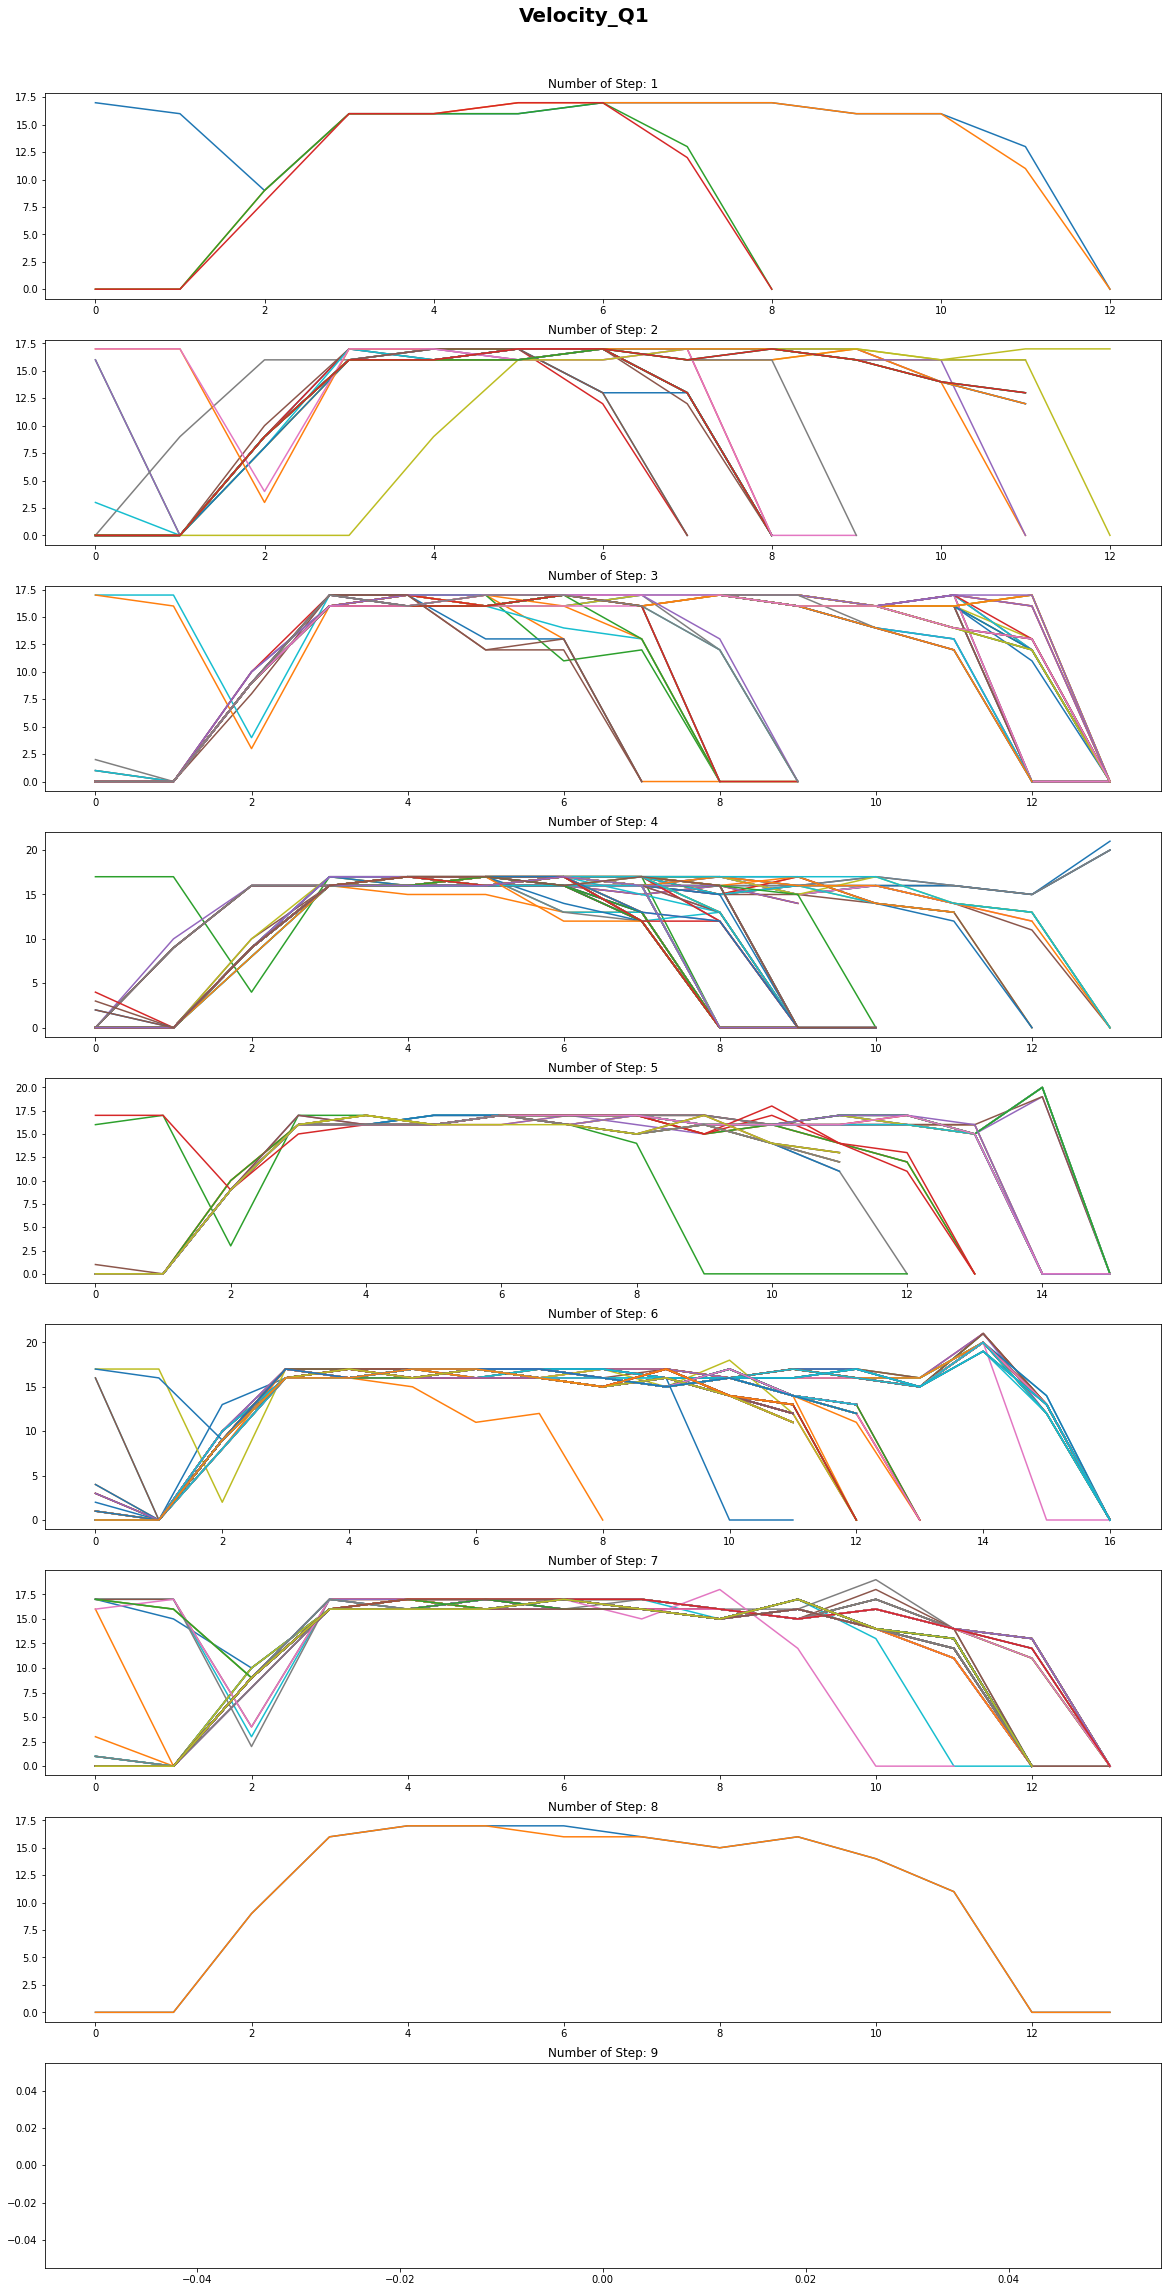

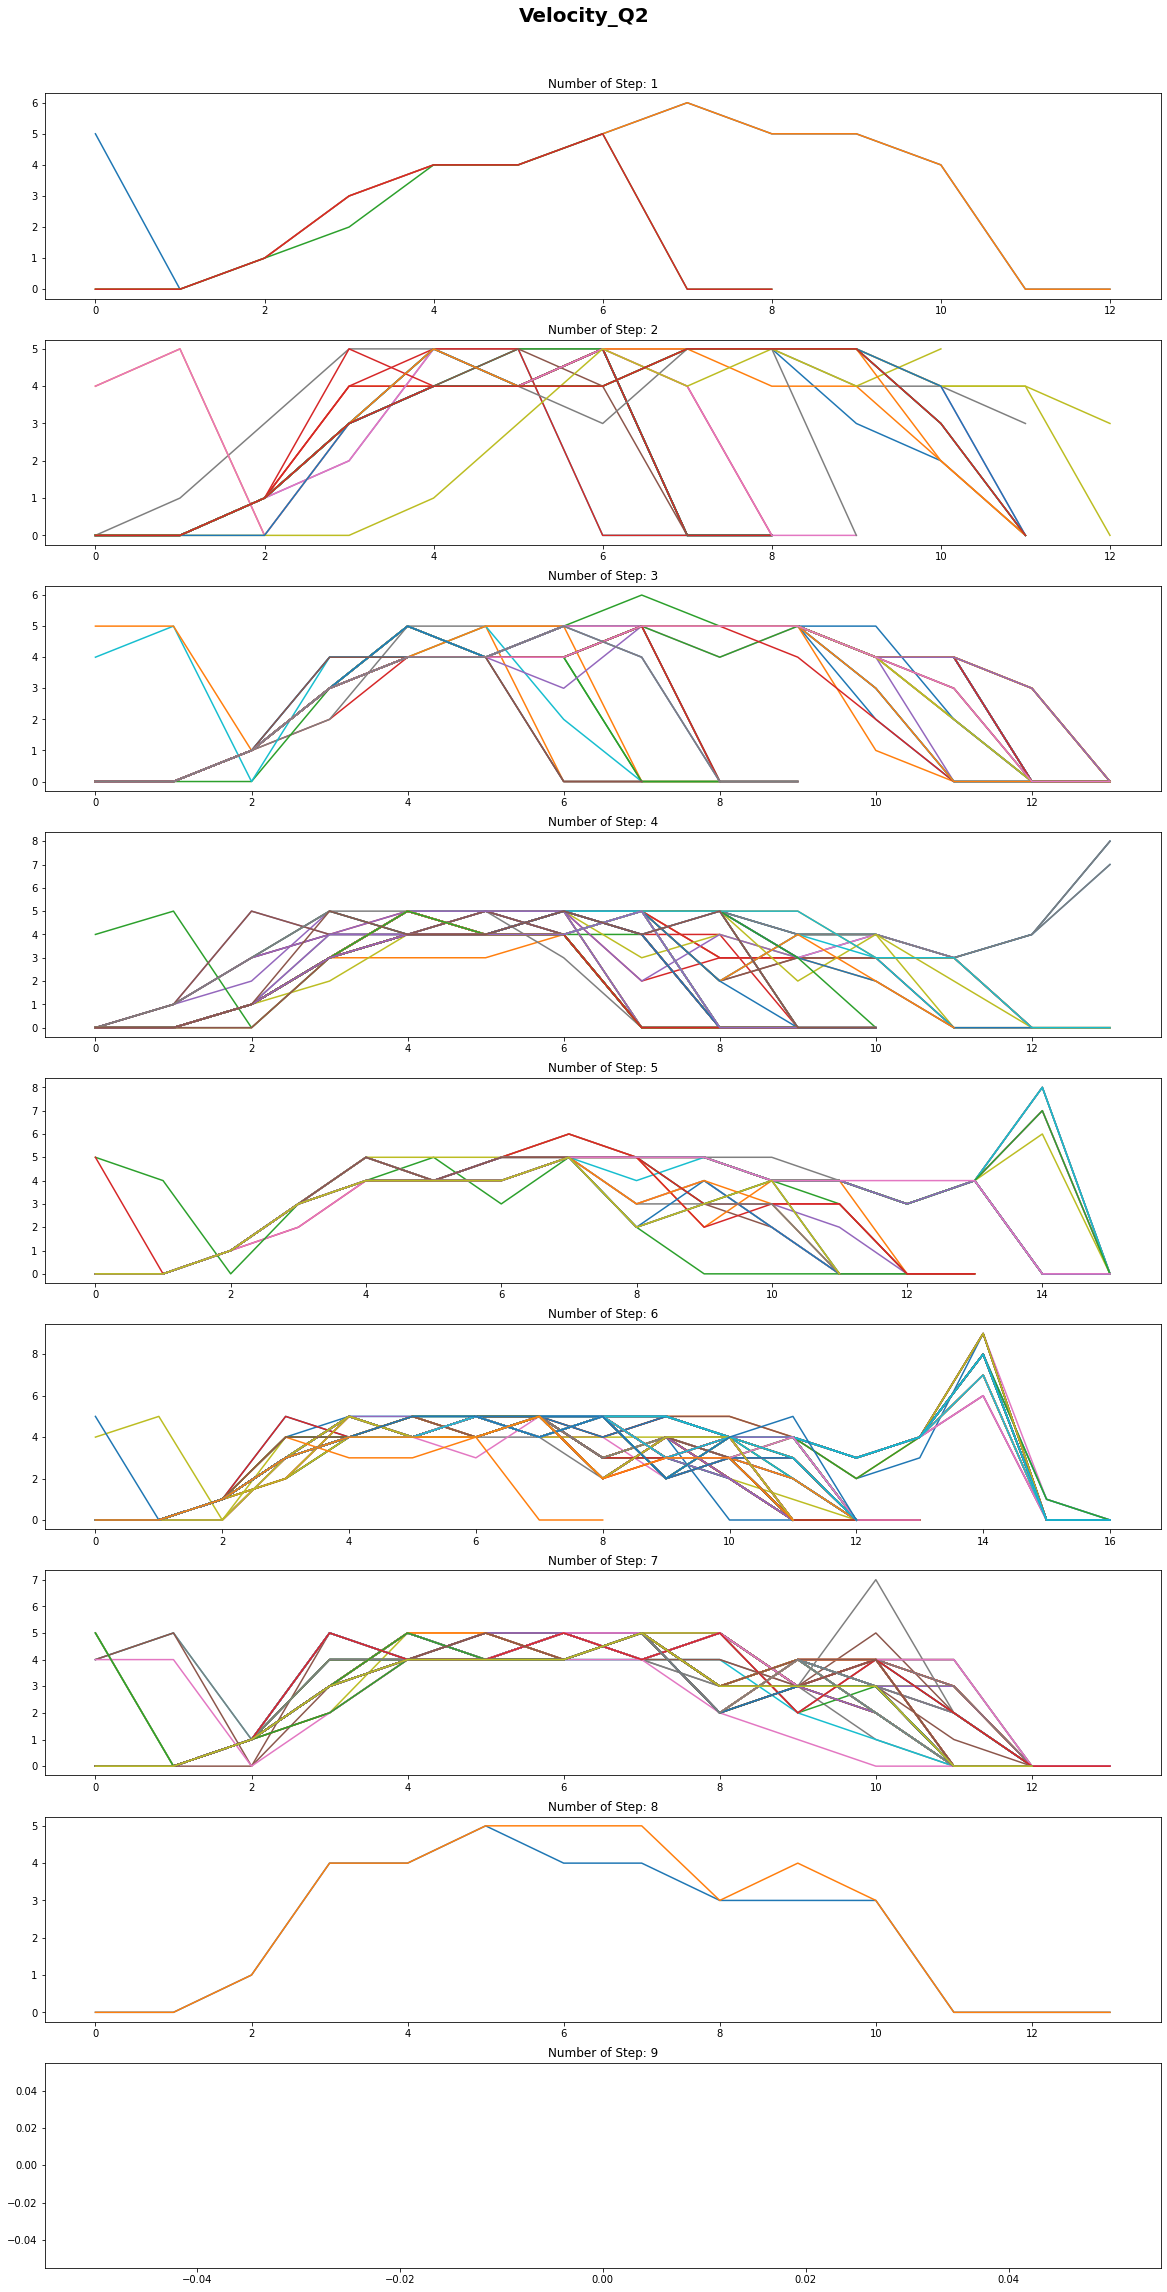

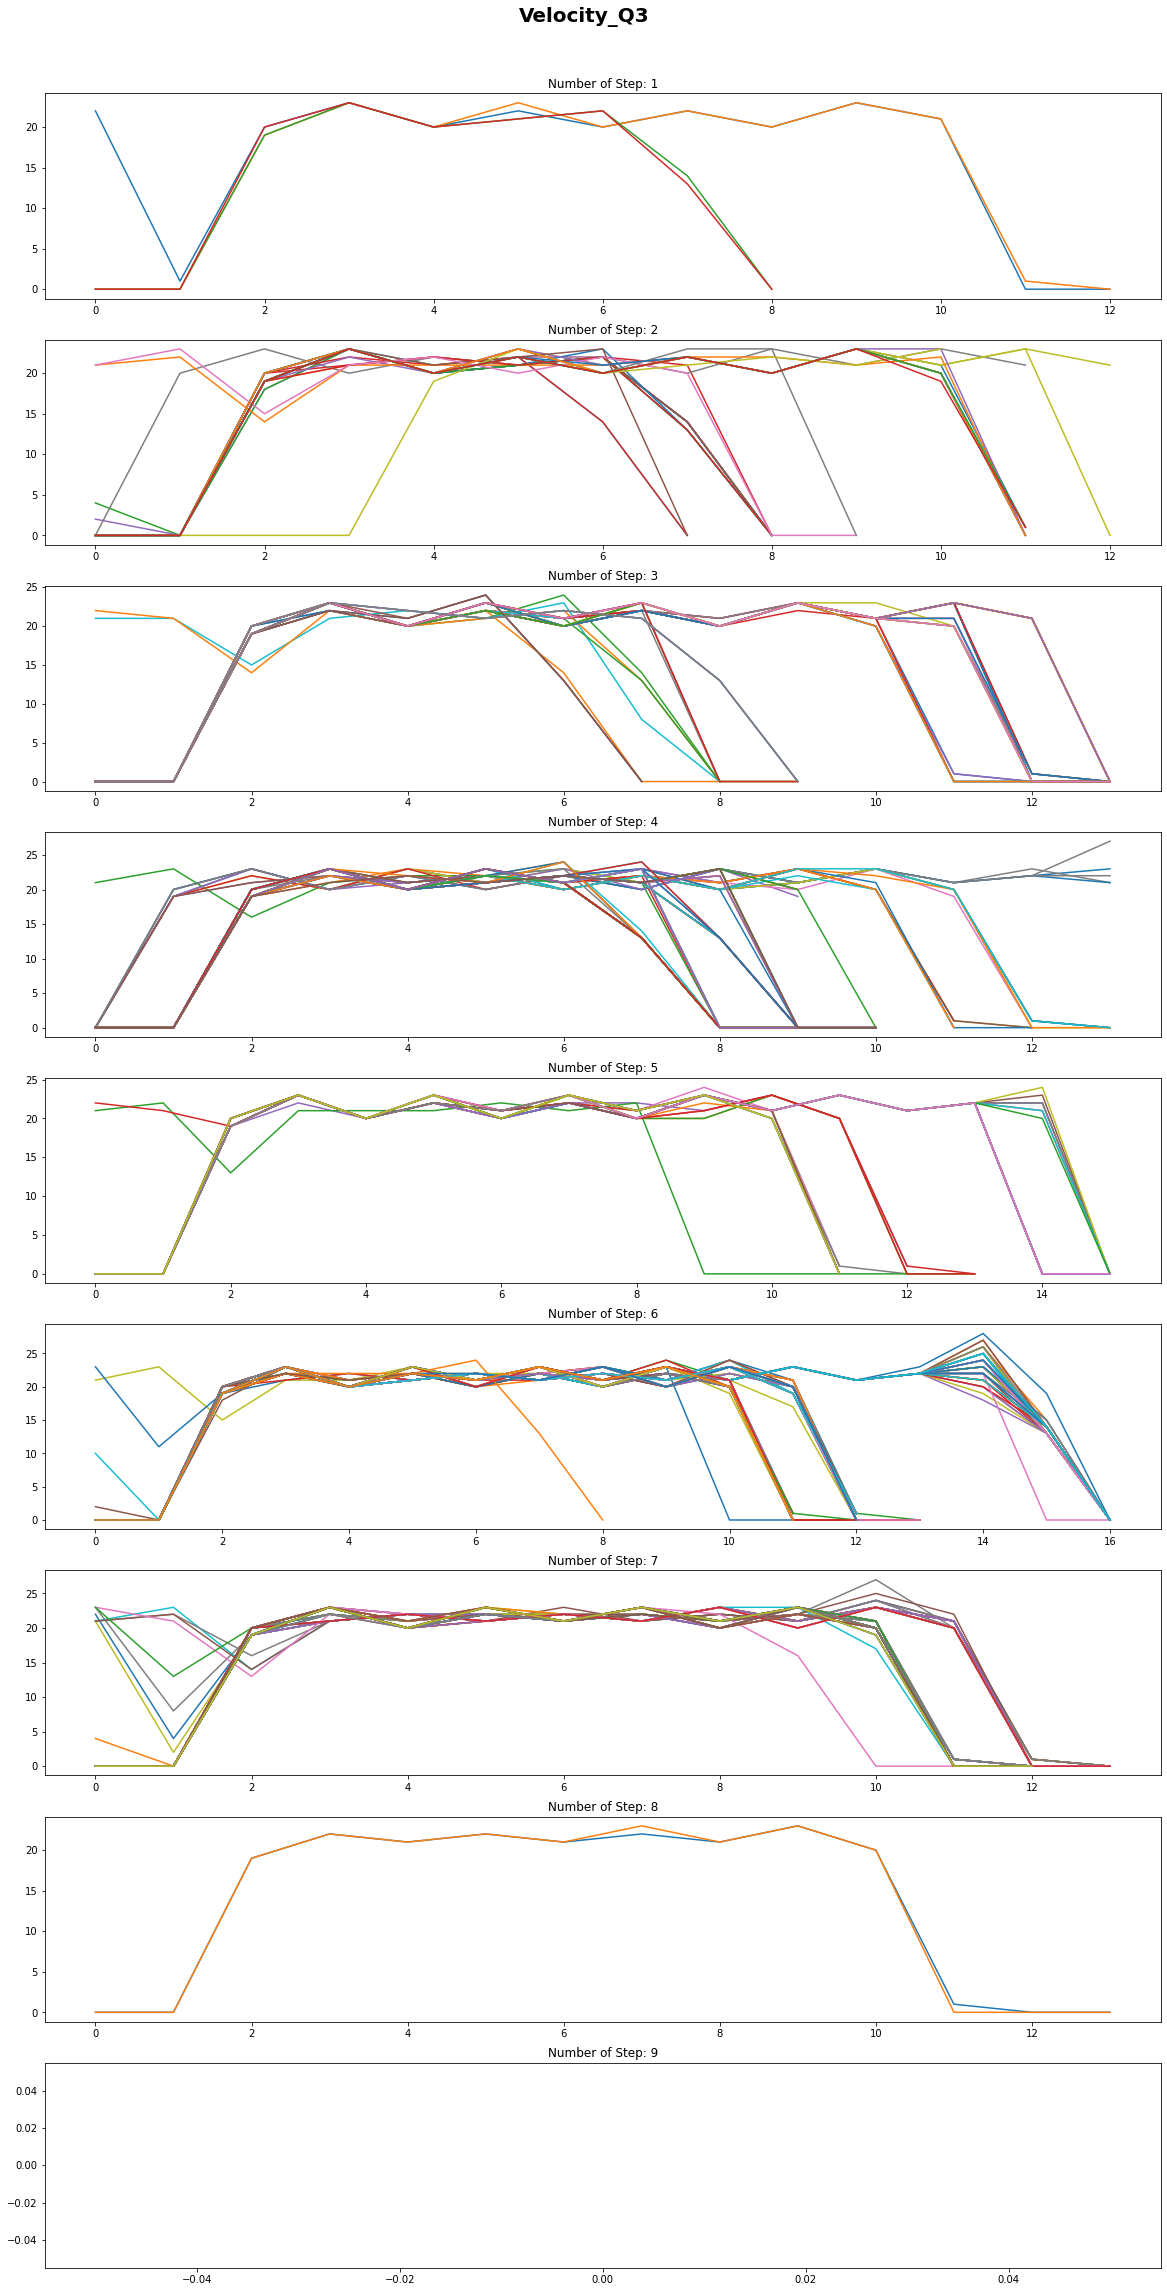

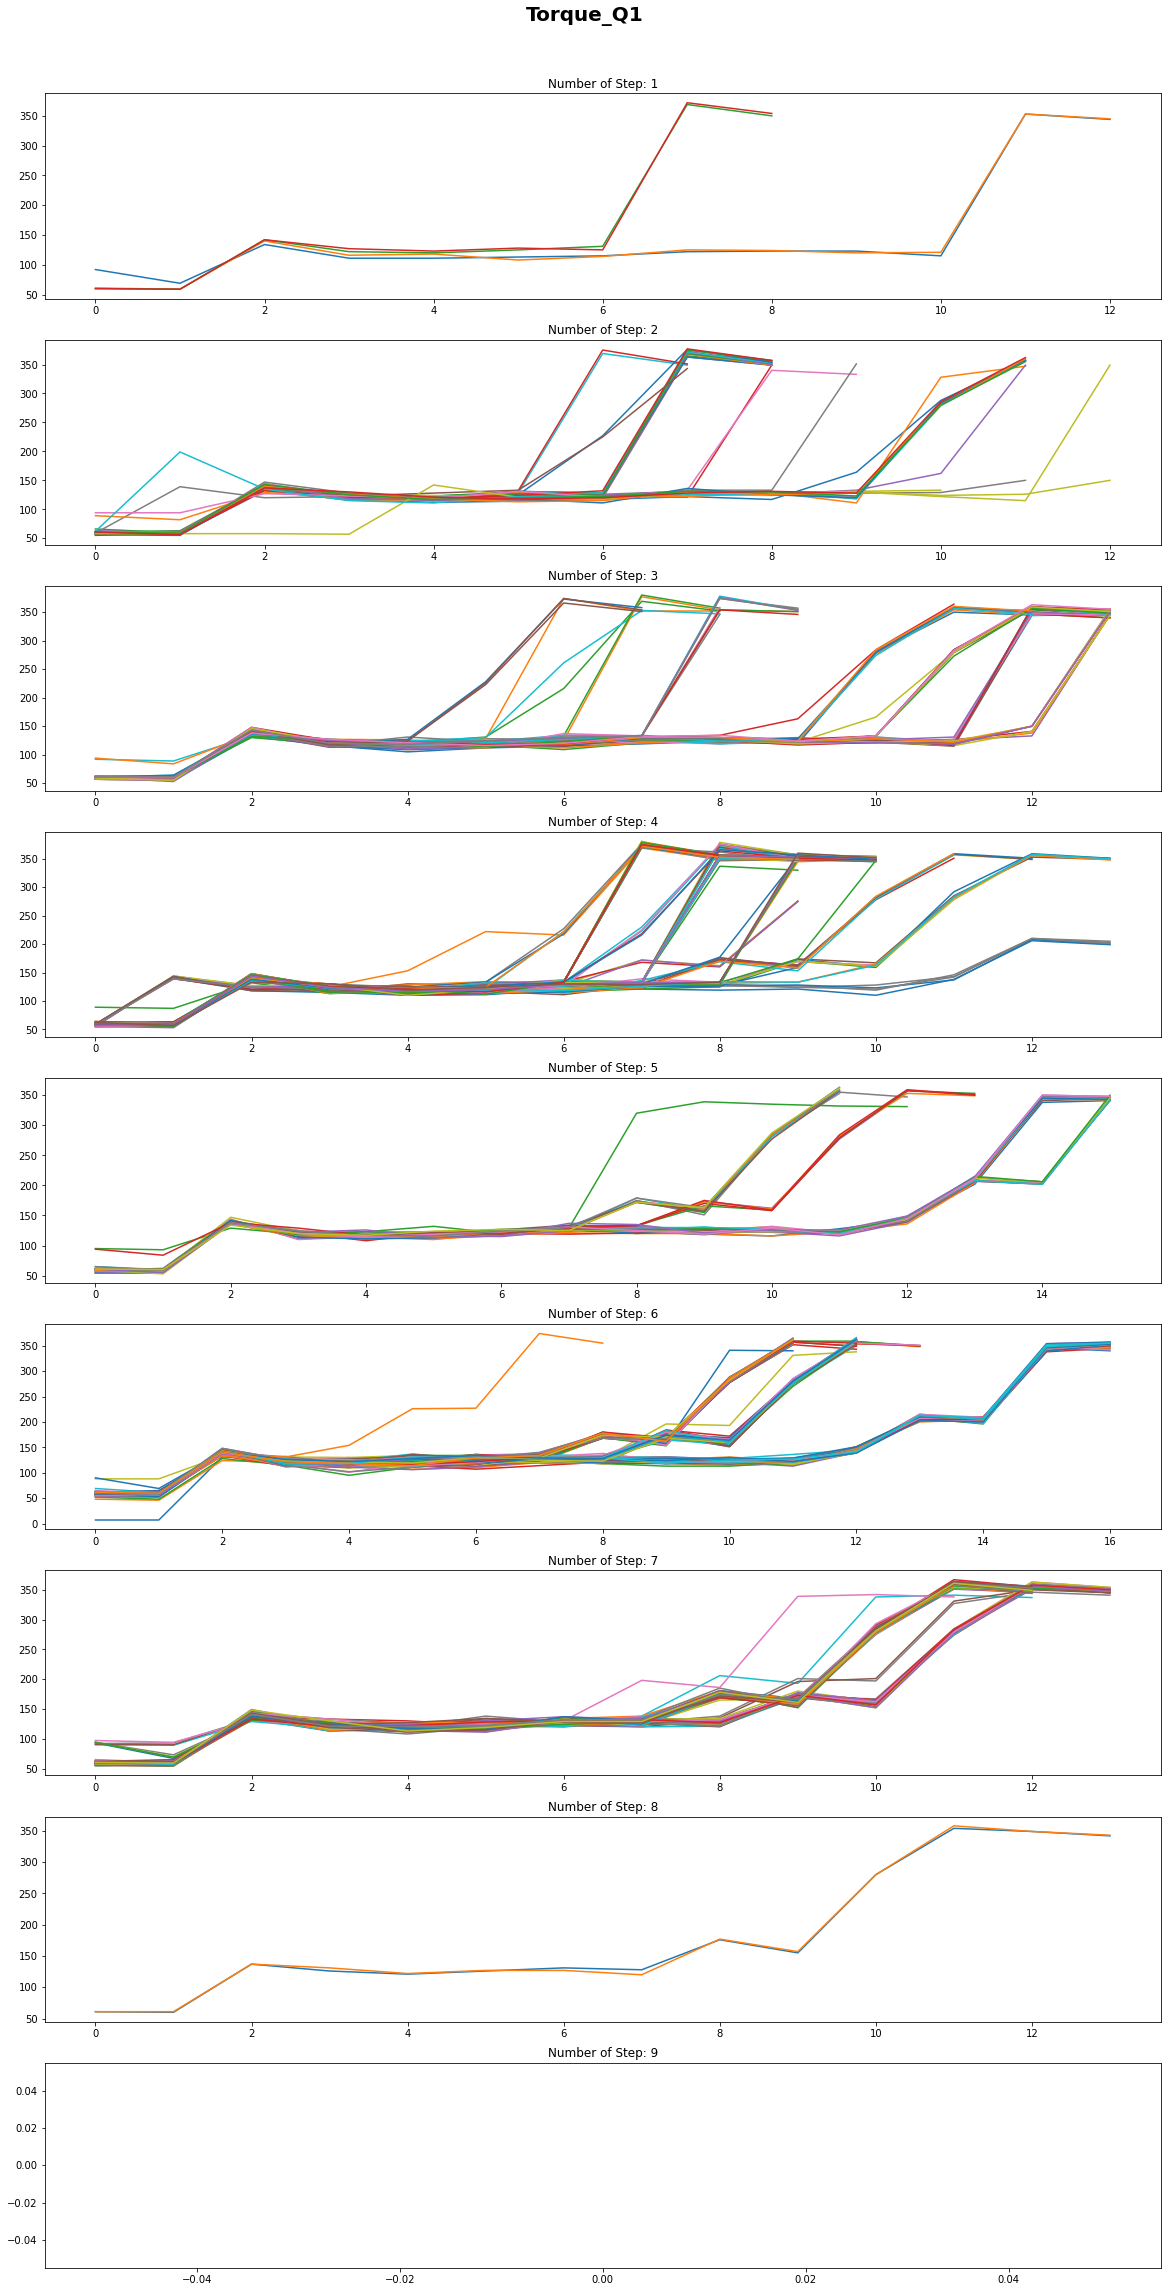

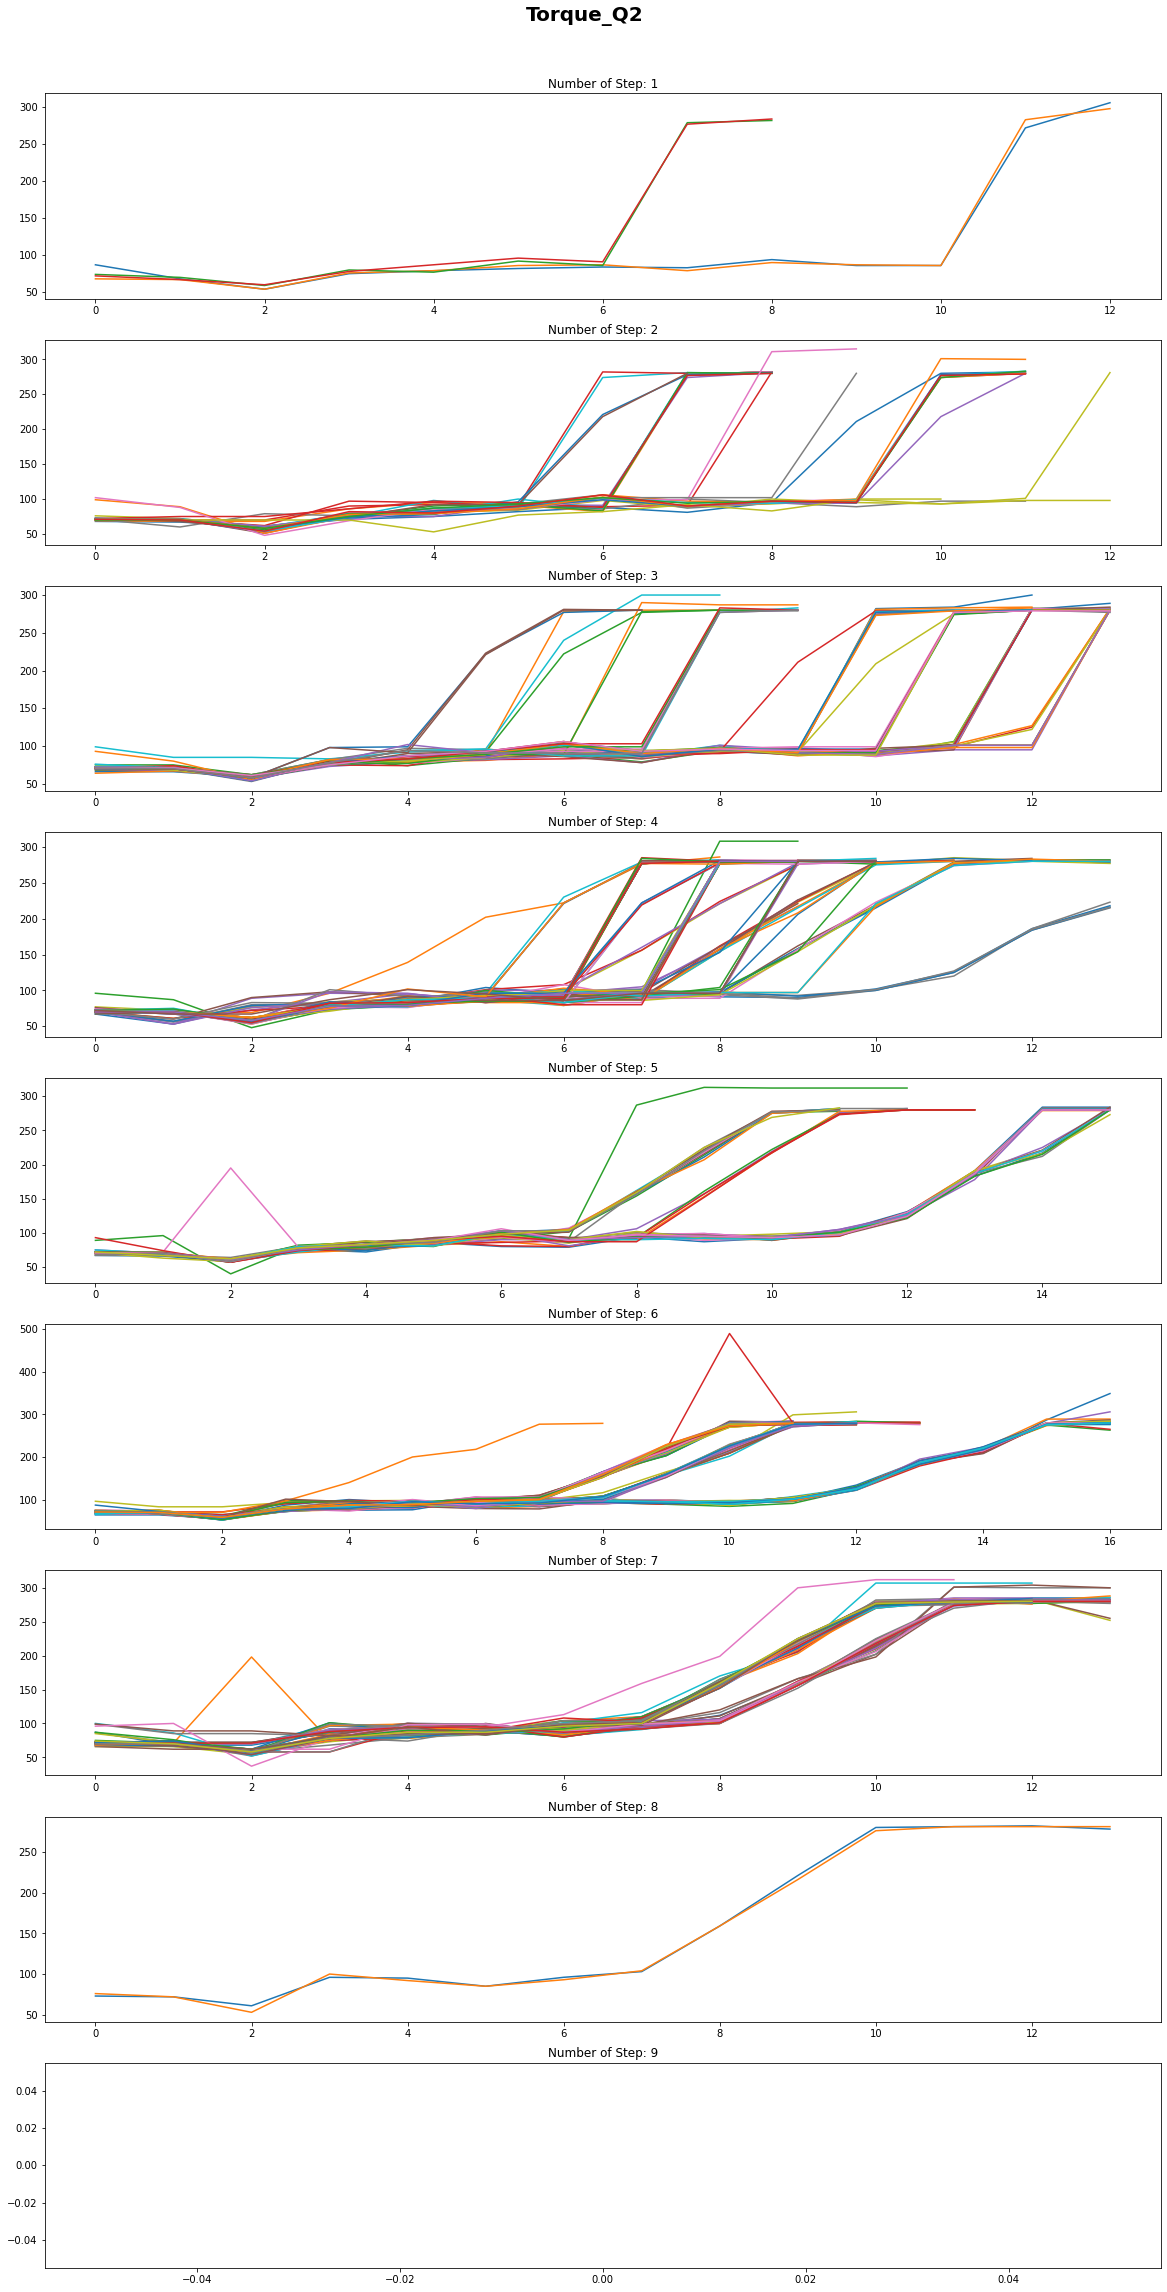

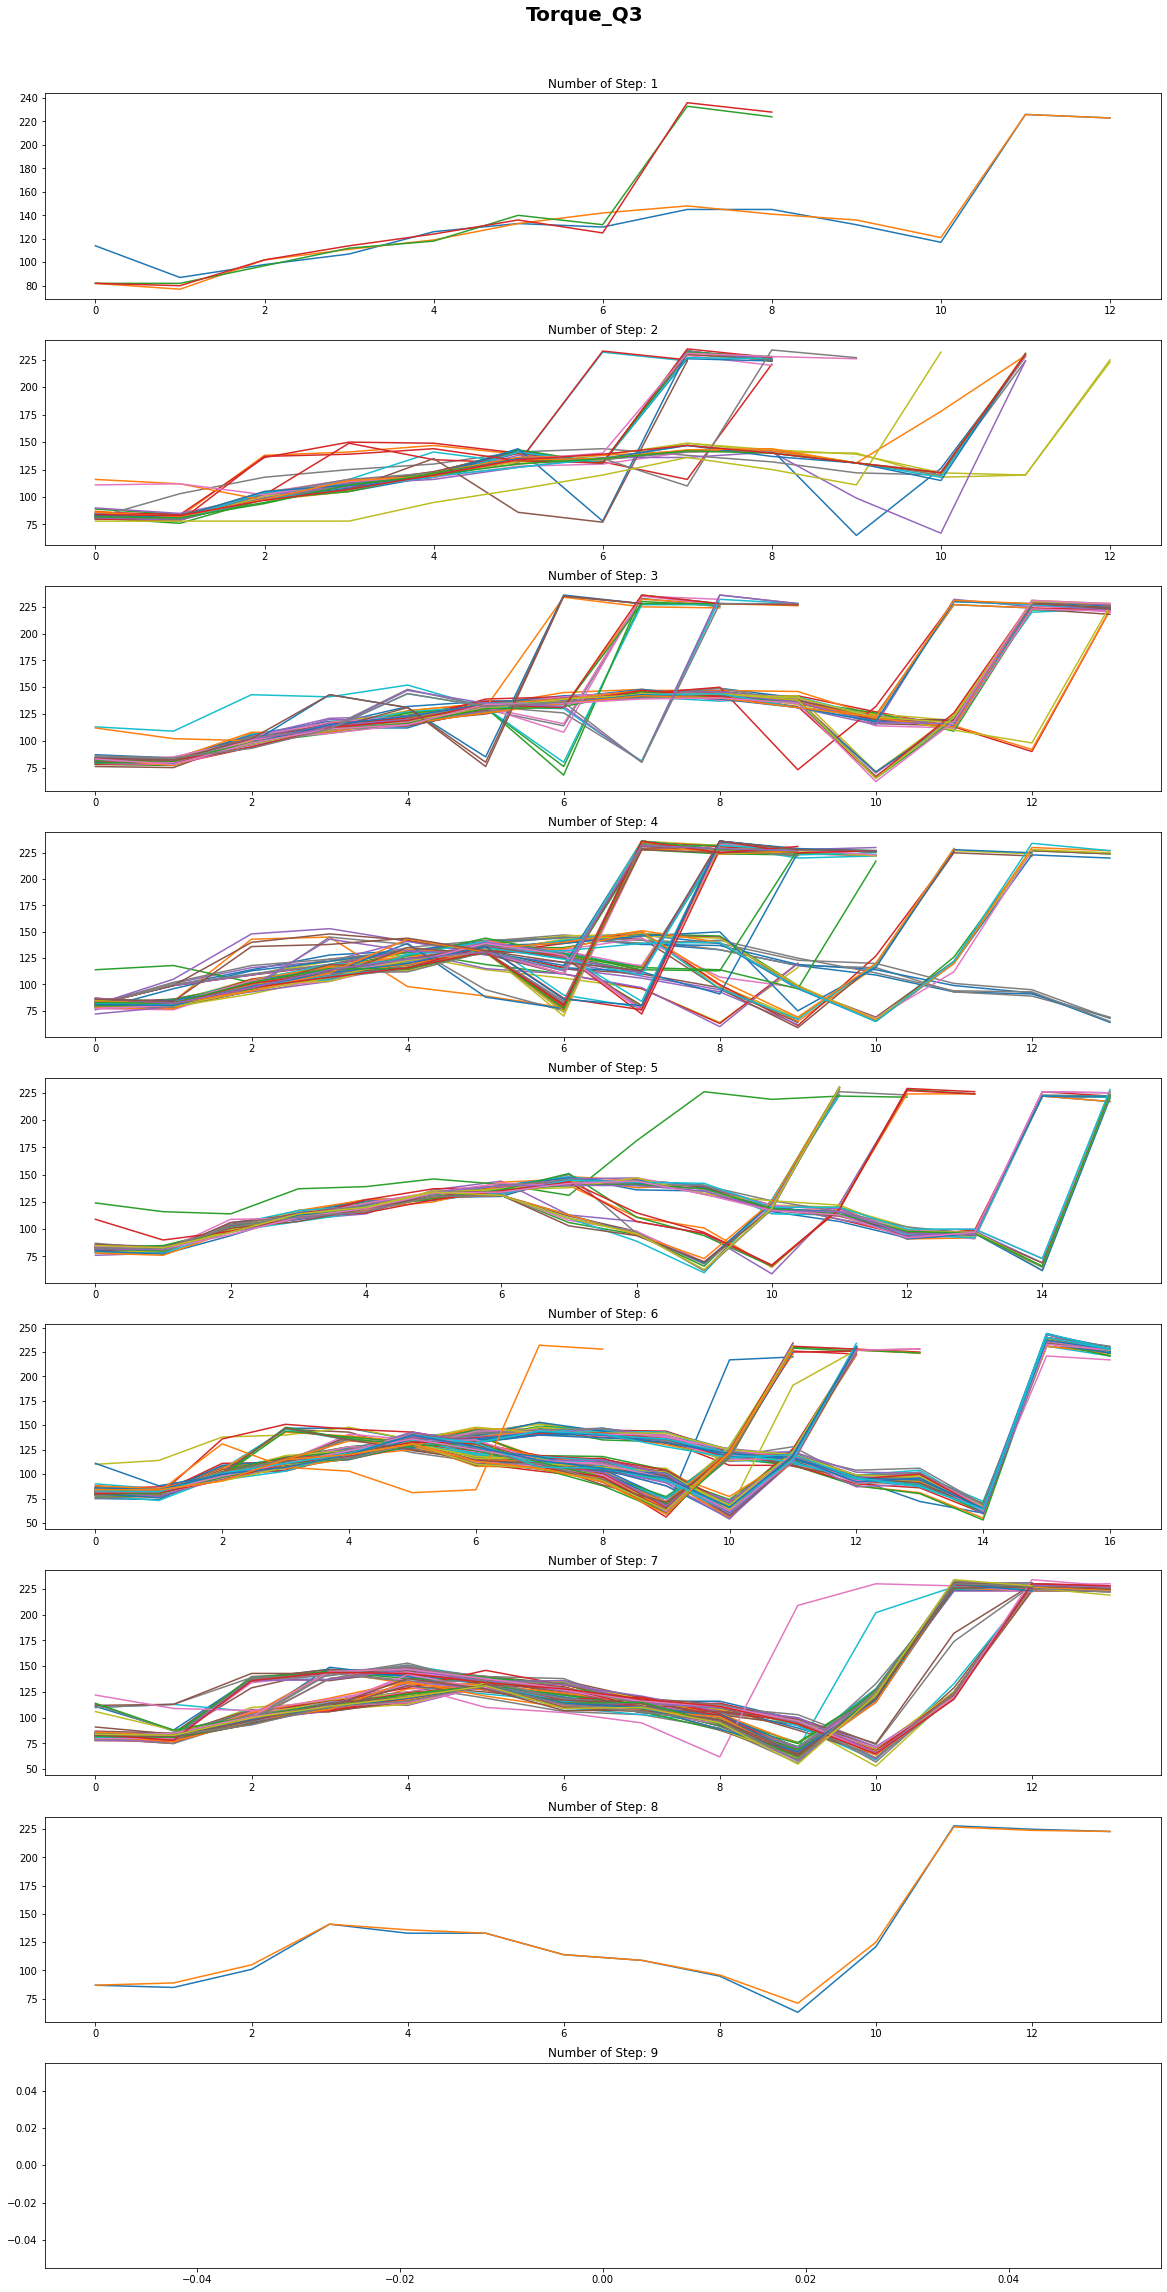

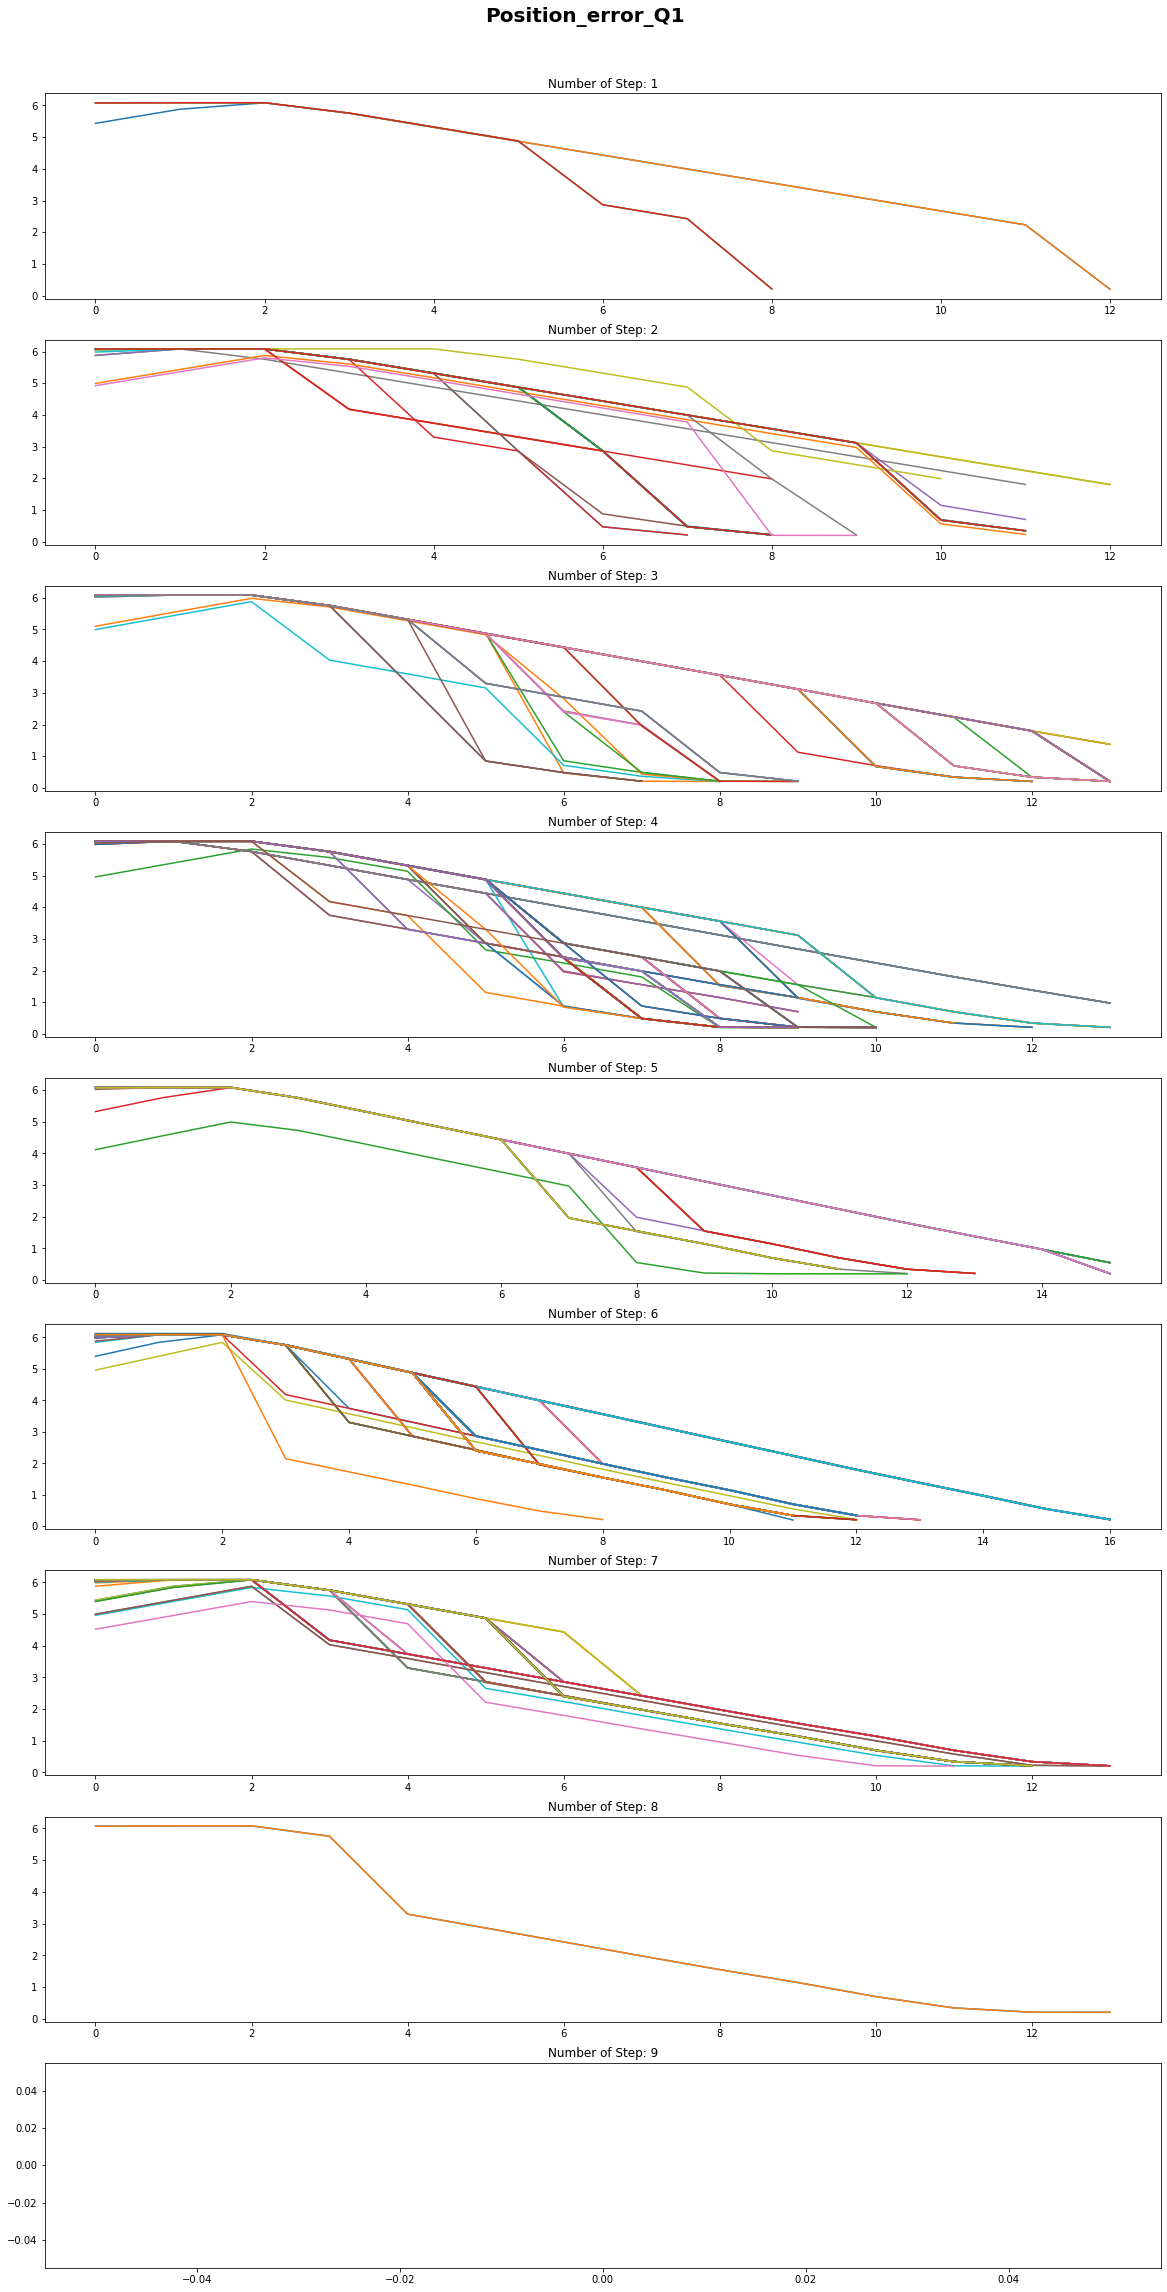

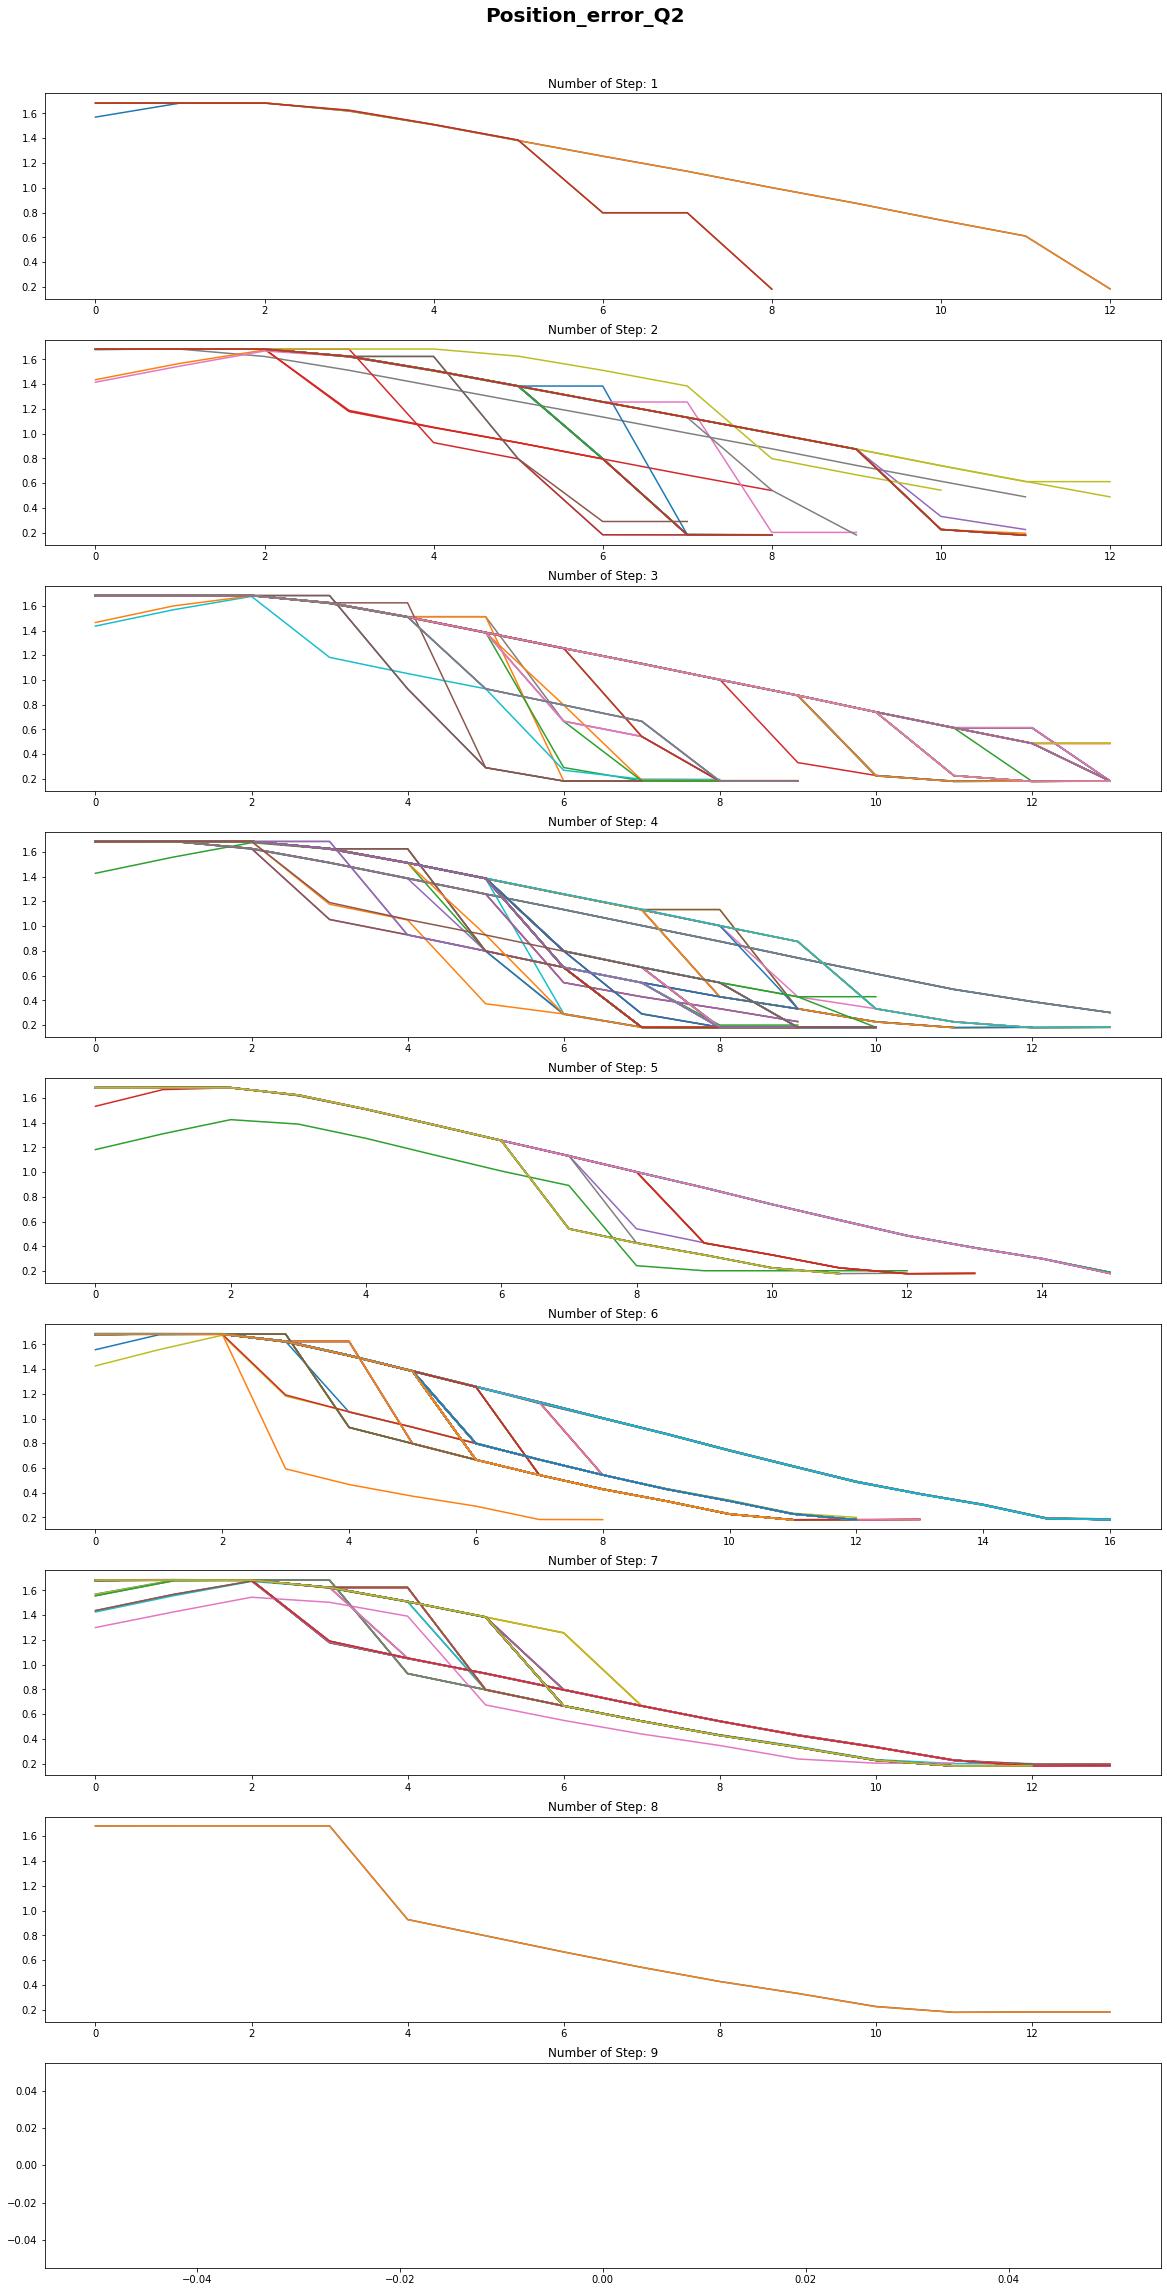

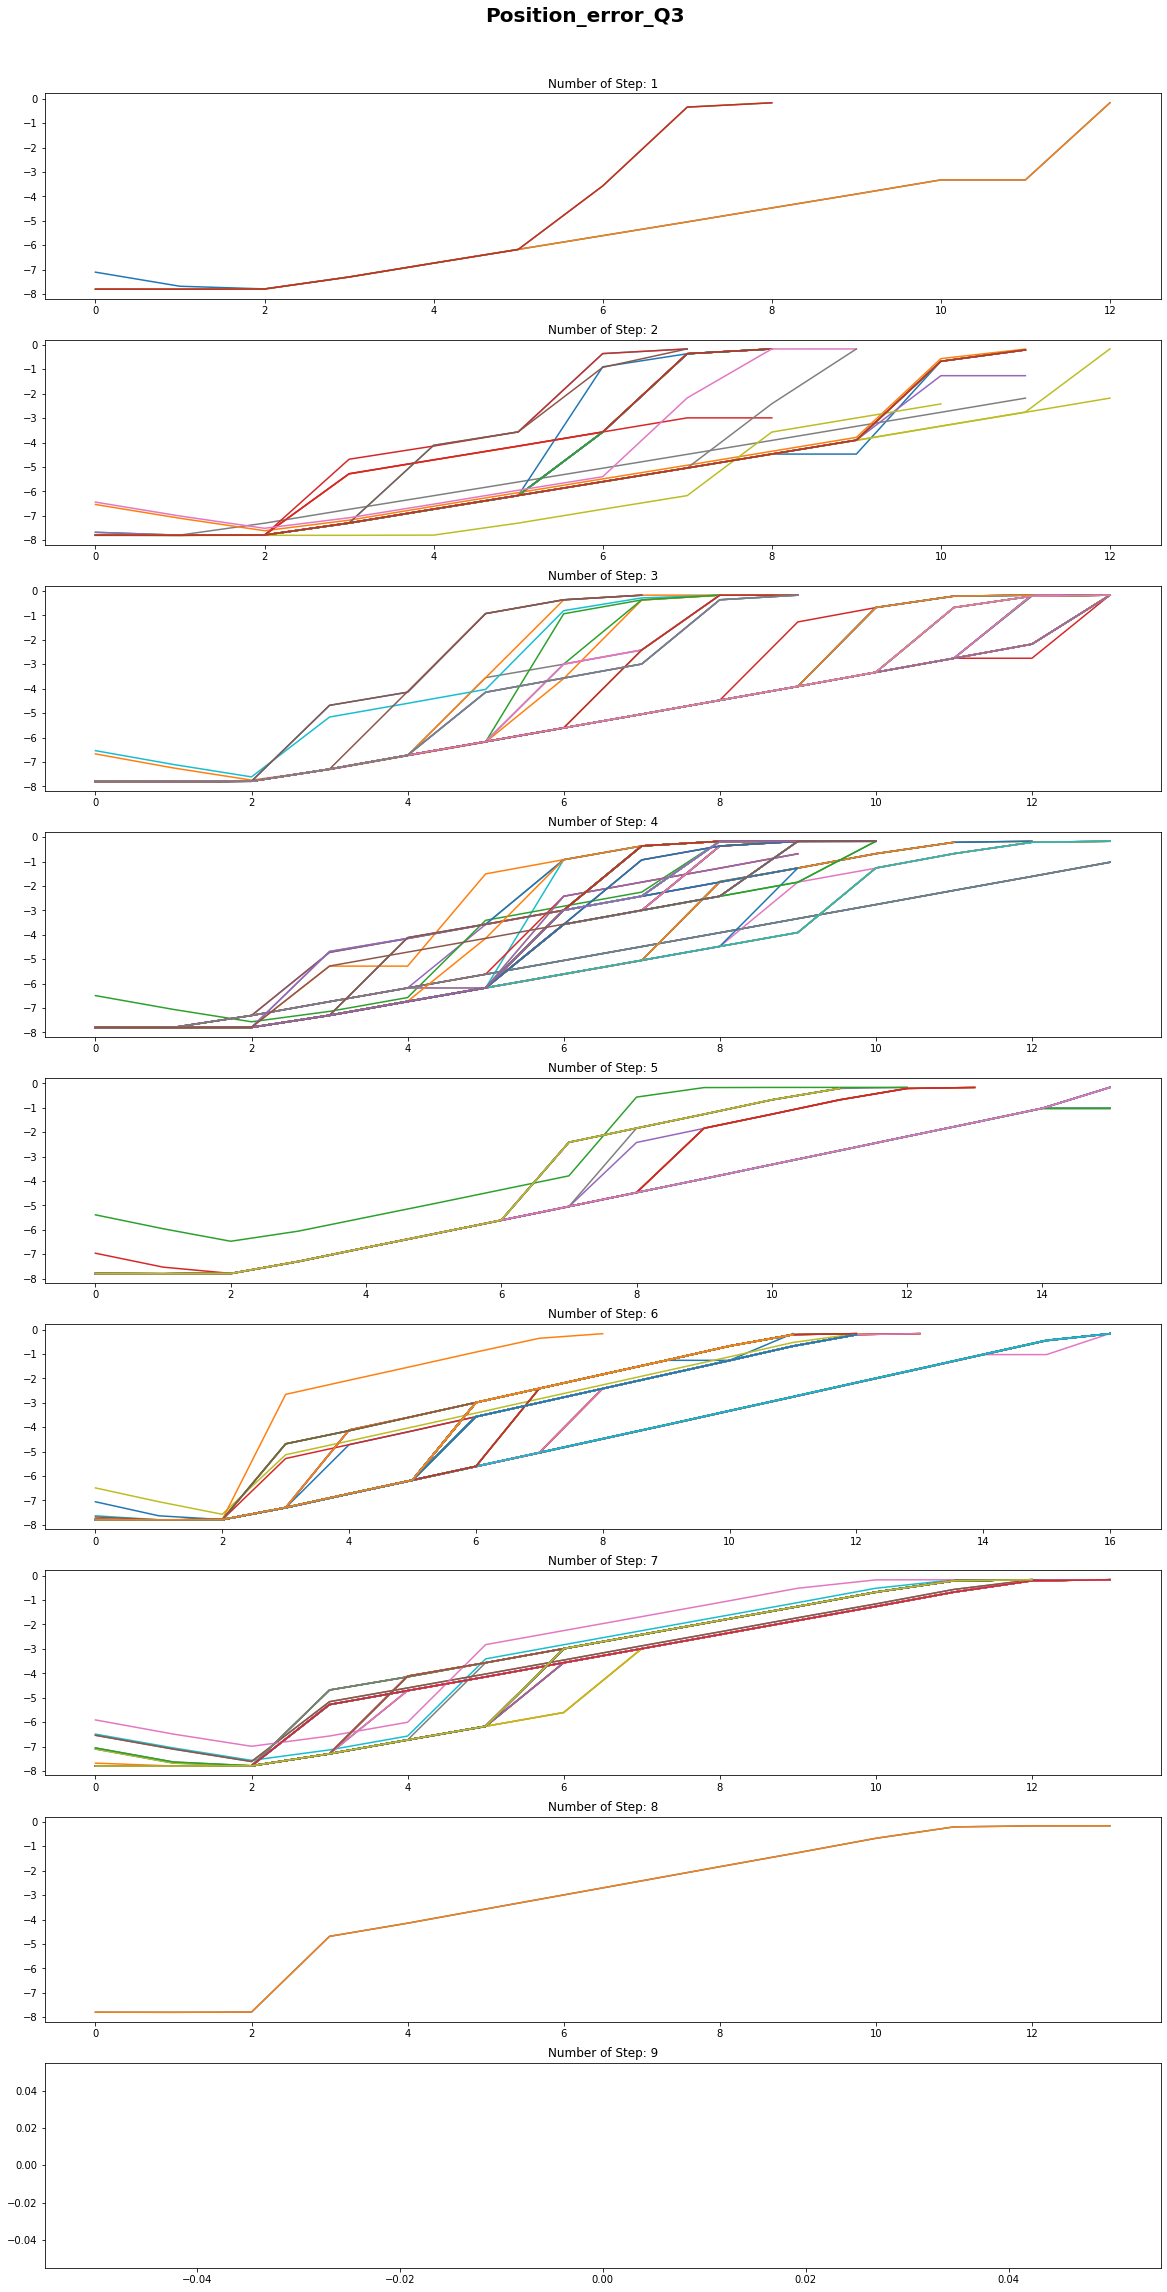

In [11]:
non_18_step_len_lst = sorted(step_df['Step_len'].unique())[:-1]
print(f"Step의 개수가 max(18)가 아닌 Sequence의 개수: {len(step_non_18_sequence_lst)}")
print(f"Step의 개수: {non_18_step_len_lst}")
step_non_18_df = df[df['Sequence'].isin(step_non_18_sequence_lst)]

for col in target_col:
    fig, axs = plt.subplots(len(sequence_dic.keys()), figsize=(20, 40))
    plt.rc('font', size=10)
    
    for idx, i in enumerate(sequence_dic.keys()):
        for s in sequence_dic[i]:
            axs[idx].plot(step_non_18_df[step_non_18_df['Sequence'] == s][col].reset_index(drop=True))
            axs[idx].set_title(f"Number of Step: {i}")
    plt.suptitle(f"{col}", fontweight='bold', fontsize=20, position=(0.5, 1.0-0.09))
    plt.show()
    print()